In [81]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder


In [12]:
#Summary statistics
df = pd.read_csv('dataa_file.csv')
#print first five rows
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [6]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [7]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7032.000000
mean,0.162147,32.371149,64.761692,2283.300441
std,0.368612,24.559481,30.090047,2266.771362
min,0.000000,0.000000,18.250000,18.800000
25%,0.000000,9.000000,35.500000,401.450000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.850000,3794.737500
max,1.000000,72.000000,118.750000,8684.800000


In [8]:
#Find missing values
df.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [9]:
#Fill the missing values with mean
df = df.fillna(df.mean(numeric_only=True))

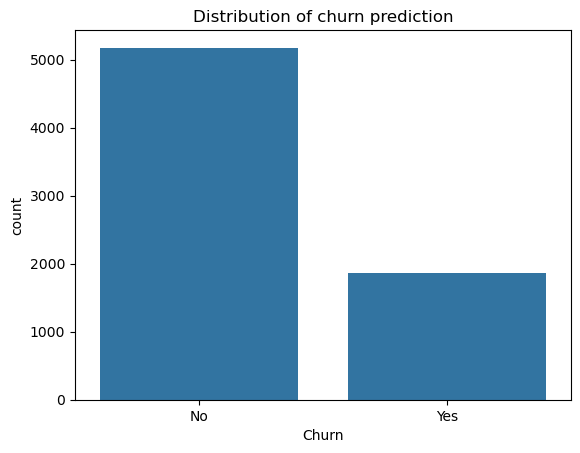

In [10]:
#Distribution of target value
sns.countplot(x='Churn' , data=df)
plt.title('Distribution of churn prediction')
plt.show()

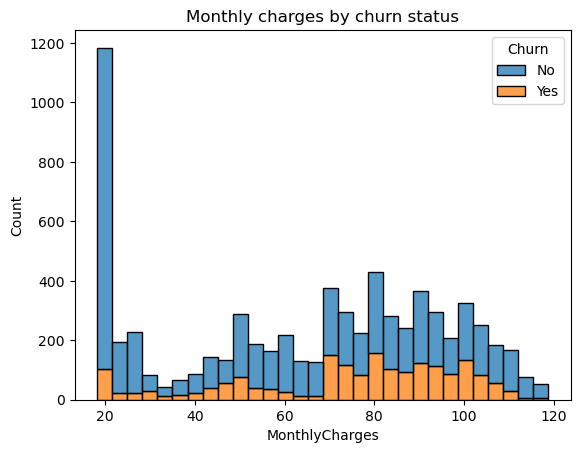

In [13]:
#Distribution of Monthly charges by churn status

sns.histplot(data=df , x='MonthlyCharges' , hue='Churn' , multiple='stack', bins=30)
plt.title('Monthly charges by churn status')
plt.show()

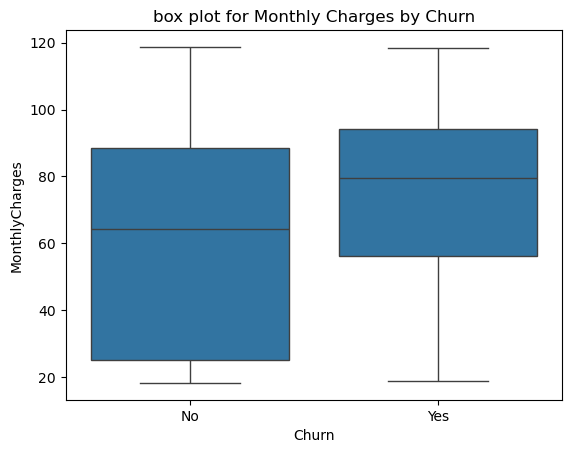

In [21]:
# Box plot for monthly charges by churn status

sns.boxplot(x='Churn' , y='MonthlyCharges' , data=df)
plt.title('box plot for Monthly Charges by Churn')
plt.show()

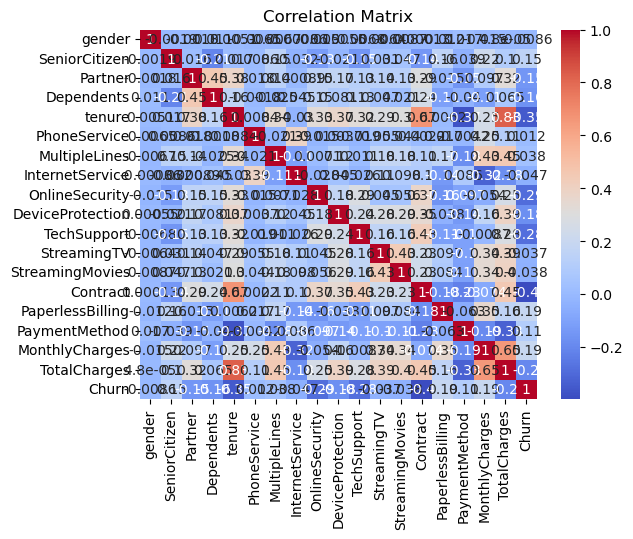

In [40]:
# correlation matrix

num_cols= list()

for column in df.columns:
    if df[column].dtype != object:
        num_cols.append(column)
        
correlation_matrix = df[num_cols].corr()

sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()
        

In [54]:
# Encode categorical variables 
label_encoders = {}
for column in ['customerID','gender' ,'Partner','OnlineBackup',	'Dependents','PhoneService','MultipleLines','InternetService',	'OnlineSecurity','DeviceProtection','TechSupport','StreamingTV','StreamingMovies','Contract','PaperlessBilling','PaymentMethod','Churn']:
    le = LabelEncoder()
    df[column]= le.fit_transform(df[column])
    label_encoders[column] = le

 # Features and Target
x = df.drop(['MonthlyCharges' , 'Churn'], axis=1)
y= df['Churn']
    

In [55]:
x.head


<bound method NDFrame.head of       customerID  gender  SeniorCitizen  Partner  Dependents  tenure  \
0           5375       0              0        1           0       1   
1           3962       1              0        0           0      34   
2           2564       1              0        0           0       2   
3           5535       1              0        0           0      45   
4           6511       0              0        0           0       2   
...          ...     ...            ...      ...         ...     ...   
7038        4853       1              0        1           1      24   
7039        1525       0              0        1           1      72   
7040        3367       0              0        1           1      11   
7041        5934       1              1        1           0       4   
7042        2226       1              0        0           0      66   

      PhoneService  MultipleLines  InternetService  OnlineSecurity  \
0                0              1  

In [57]:
x.dtypes


customerID            int64
gender                int64
SeniorCitizen         int64
Partner               int64
Dependents            int64
tenure                int64
PhoneService          int64
MultipleLines         int64
InternetService       int64
OnlineSecurity        int64
OnlineBackup          int64
DeviceProtection      int64
TechSupport           int64
StreamingTV           int64
StreamingMovies       int64
Contract              int64
PaperlessBilling      int64
PaymentMethod         int64
TotalCharges        float64
dtype: object

In [60]:
y.dtypes

dtype('int64')

In [62]:
x_train.shape, y_train.shape

((4930, 19), (4930,))

In [74]:
x=x.fillna(x.median())

In [75]:
x.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
TotalCharges        0
dtype: int64

In [76]:
# Split data into training and testing sets
x_train , x_test , y_train , y_test = train_test_split(x , y, test_size=0.3, random_state=0)

In [77]:
# Feature scaling

scaler= StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [78]:
np.isnan(x_train).any(),np.isinf(x_train).any()

(np.False_, np.False_)

In [79]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression 

logreg = LogisticRegression()
logreg.fit(x_train , y_train)
logreg_pred = logreg.predict(x_test)
logreg_accuracy = accuracy_score(y_test, logreg_pred)

In [83]:
# Display accuracy and performance metrics

from sklearn.metrics import accuracy_score, classification_report
loreg_accuracy = accuracy_score(y_test,logreg_pred)

print(f'Logistic Regression Accuracy:{logreg_accuracy*100:.2f}')
print('\nLogistic Regression Classification Report:')
print(classification_report(y_test, logreg_pred))


Logistic Regression Accuracy:78.80

Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.89      0.86      1560
           1       0.62      0.50      0.55       553

    accuracy                           0.79      2113
   macro avg       0.73      0.69      0.71      2113
weighted avg       0.78      0.79      0.78      2113



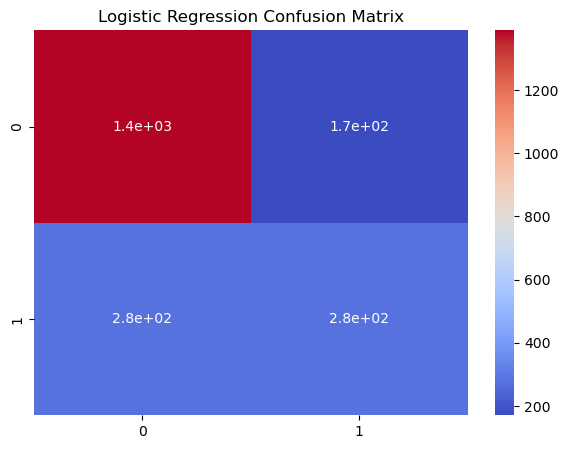

In [85]:
# Confusion Matrix

plt.figure(figsize=(7,5))
sns.heatmap(confusion_matrix(y_test, logreg_pred), annot=True, cmap='coolwarm')
plt.title('Logistic Regression Confusion Matrix')
plt.show()